<a href="https://colab.research.google.com/github/VaneezaAhmad/Text-Prediction/blob/main/predictive_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
import nltk
from nltk import word_tokenize, RegexpTokenizer
from nltk.probability import FreqDist

In [6]:
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import RMSprop

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [8]:
from keras.wrappers.scikit_learn import KerasClassifier

# Read in Data

In [20]:
from google.colab import files
uploaded = files.upload()

Saving wonderland.txt to wonderland.txt


In [21]:
alice =  open("wonderland.txt", "r", encoding="utf_8").read()
alice= alice.lower() 

# Preprocessing the Data

In [22]:
# create mapping of unique chars to integers
chars = sorted(list(set(alice)))
char_to_int = dict((c, i) for i, c in enumerate(chars))

In [23]:
print(chars)

['\n', ' ', '!', '#', '$', '%', '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', '@', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '‘', '’', '“', '”']


In [24]:
n_chars = len(alice)
n_vocab = len(chars)
print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab)

Total Characters:  163816
Total Vocab:  60


In [25]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [26]:
# tokenized = word_tokenize(alice)

In [27]:
tokenized = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")
alice_token = tokenized.tokenize(alice)

In [28]:
len(alice_token)

29763

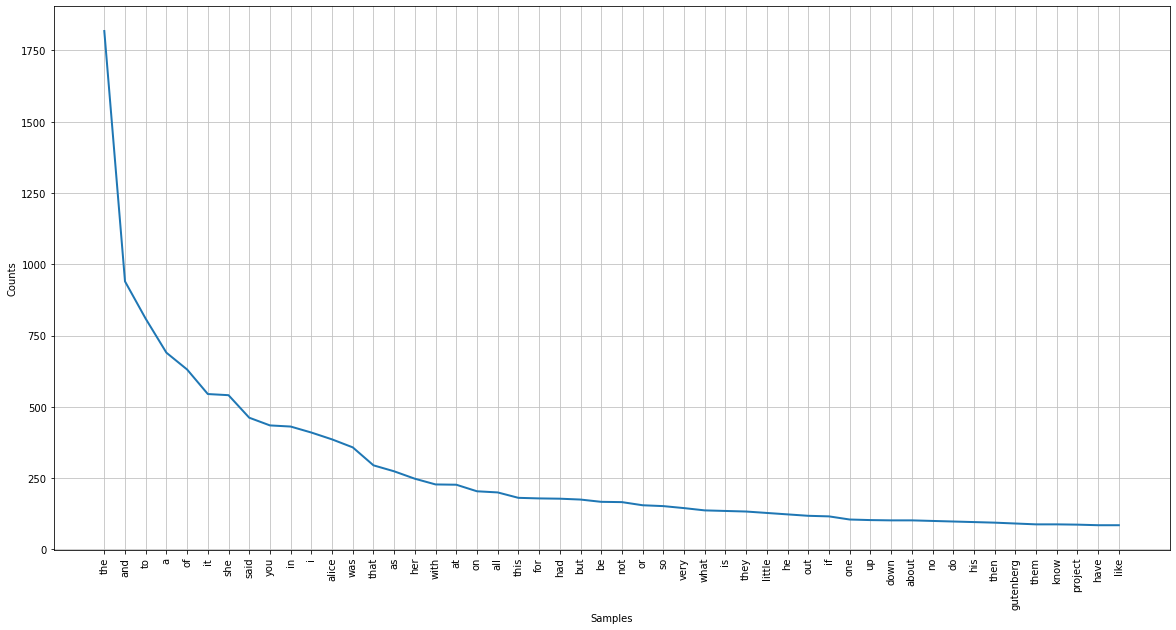

In [29]:
# Frequency distribution of words 
fdist = FreqDist(alice_token)
plt.figure(figsize=(20, 10))
fdist.plot(50);

In [30]:
unique = list(set(alice_token))

In [31]:
len(unique)

3075

In [32]:
WORD_LENGTH = 3
prev_words = []
next_words = []
for i in range(len(alice_token) - WORD_LENGTH):
    prev_words.append(alice_token[i:i + WORD_LENGTH])
    next_words.append(alice_token[i + WORD_LENGTH])
print(prev_words[:5])
print(next_words[:5])

[['project', 'gutenberg’s', 'alice’s'], ['gutenberg’s', 'alice’s', 'adventures'], ['alice’s', 'adventures', 'in'], ['adventures', 'in', 'wonderland'], ['in', 'wonderland', 'by']]
['adventures', 'in', 'wonderland', 'by', 'lewis']


In [33]:
unique_words = np.unique(alice_token)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

In [34]:
len(unique_words)

3075

In [35]:
unique_words

array(['a', 'abide', 'able', ..., 'zealand', 'zigzag', 'zip'],
      dtype='<U16')

In [36]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    y[i, unique_word_index[next_words[i]]] = 1

In [37]:
len(X), len(y), X.shape, y.shape

(29760, 29760, (29760, 3, 3075), (29760, 3075))

# First Model

In [70]:
model = Sequential()
model.add(LSTM(32, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation("softmax"))

In [71]:
optimizer = RMSprop(learning_rate=0.01)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
history=model.fit(X,y, epochs=100, batch_size=64, validation_split=0.05).history

Epoch 1/100
442/442 [==============================] - 33s 33ms/step - loss: 6.3505 - accuracy: 0.0623 - val_loss: 7.0244 - val_accuracy: 0.0968
Epoch 2/100
442/442 [==============================] - 14s 31ms/step - loss: 5.5730 - accuracy: 0.1114 - val_loss: 7.5361 - val_accuracy: 0.1136
Epoch 3/100
442/442 [==============================] - 14s 31ms/step - loss: 5.3770 - accuracy: 0.1495 - val_loss: 8.3097 - val_accuracy: 0.1102
Epoch 4/100
442/442 [==============================] - 13s 29ms/step - loss: 5.4155 - accuracy: 0.1712 - val_loss: 8.7020 - val_accuracy: 0.1243
Epoch 5/100
442/442 [==============================] - 13s 29ms/step - loss: 5.3817 - accuracy: 0.1952 - val_loss: 8.8464 - val_accuracy: 0.1250
Epoch 6/100
442/442 [==============================] - 13s 31ms/step - loss: 5.2928 - accuracy: 0.2176 - val_loss: 8.9150 - val_accuracy: 0.1230
Epoch 7/100
442/442 [==============================] - 14s 31ms/step - loss: 5.2428 - accuracy: 0.2346 - val_loss: 9.0570 - val_ac

In [43]:
def metric(model, X):
  # make predictions (predict or predict_proba)
  pred = model.predict(X)
  # take top 10 predictions 
  top_ten = pred[:10]
  print(top_ten)
  # check if y is in those top 10 
  if y in top_ten:
    print(y)
  else:
    print("Nope")

In [44]:
metric(model, X)

[[4.93489788e-04 7.43314388e-07 1.13751177e-07 ... 6.05842899e-07
  1.76036153e-07 2.98016289e-07]
 [2.26060802e-04 3.38830120e-09 6.30686947e-10 ... 7.88997201e-10
  3.83419185e-10 6.37946029e-10]
 [5.80252800e-03 7.88428224e-07 1.99403672e-07 ... 2.50272421e-07
  1.14452007e-07 2.35975349e-07]
 ...
 [1.34006099e-04 1.19213746e-06 2.05926995e-07 ... 8.73225076e-07
  2.99128658e-07 3.94290680e-07]
 [1.53024466e-05 1.47204089e-08 1.76821768e-09 ... 4.35812186e-09
  1.64226066e-09 2.21145502e-09]
 [2.67814394e-05 8.09627281e-08 1.37315608e-08 ... 4.24086295e-08
  1.44437875e-08 1.89021740e-08]]
Nope


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


## Save model

In [15]:
from google.colab import files
uploaded = files.upload()

Saving first_model (1).h5 to first_model (1) (1).h5
Saving history(fsm).p to history(fsm).p


In [12]:
model =  open("first_model (1).h5", "r")


In [3]:
import pickle

In [73]:
model.save('first_model.h5')
pickle.dump(history, open("history.p", "wb"))

## Load model to evaluate

In [17]:
model = load_model('first_model (1).h5')
history = pickle.load(open("history(fsm).p", "rb"))

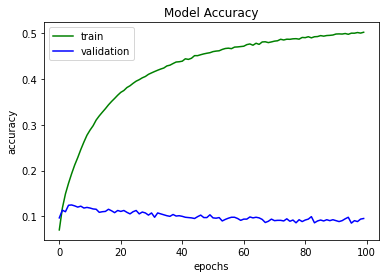

In [75]:
plt.plot(history["accuracy"], color="green")
plt.plot(history["val_accuracy"], color="blue")
plt.title("Model Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["train", "validation"]);

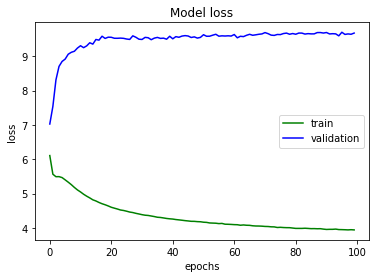

In [76]:
plt.plot(history["loss"], color="green")
plt.plot(history["val_loss"], color="blue")
plt.title("Model loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train", "validation"]);

# Grid Search

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
def create_model(optimizer="RMSprop(learning_rate=0.01)"):
    model = Sequential()
    model.add(LSTM(64, input_shape=(WORD_LENGTH, len(unique_words))))
    model.add(Dense(len(unique_words)))
    model.add(Activation("softmax"))

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=["accuracy"])
    return model


In [54]:
model = KerasClassifier(build_fn=create_model, verbose=1)

In [55]:
param_grid = {
    'epochs': [50,100], 
    'batch_size':[32,62,128],
    'optimizer':['RMSprop', 'Adam'],
    # 'kc__dropout': [0.5, 0.4, 0.3, 0.2, 0.1, 0]
}

In [56]:
kfold_splits = 3
grid = GridSearchCV(model,  
                    n_jobs=1, 
                    verbose=1,
                    return_train_score=True,
                    cv=kfold_splits,  #StratifiedKFold(n_splits=kfold_splits, shuffle=True)
                    param_grid=param_grid)

In [ ]:
grid_result = grid.fit(X, y) #callbacks=[tbCallBack]


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/50
620/620 [==============================] - 27s 29ms/step - loss: 6.8083 - accuracy: 0.0640
Epoch 2/50
620/620 [==============================] - 17s 28ms/step - loss: 6.1067 - accuracy: 0.0655
Epoch 3/50
620/620 [==============================] - 18s 29ms/step - loss: 6.0272 - accuracy: 0.0658
Epoch 4/50
620/620 [==============================] - 18s 29ms/step - loss: 5.9300 - accuracy: 0.0681
Epoch 5/50
620/620 [==============================] - 18s 30ms/step - loss: 5.8319 - accuracy: 0.0810
Epoch 6/50
620/620 [==============================] - 18s 29ms/step - loss: 5.7192 - accuracy: 0.0889
Epoch 7/50
620/620 [==============================] - 18s 29ms/step - loss: 5.6190 - accuracy: 0.0947
Epoch 8/50
620/620 [==============================] - 18s 29ms/step - loss: 5.5110 - accuracy: 0.1040
Epoch 9/50
620/620 [==============================] - 18s 29ms/step - loss: 5.4731 - accuracy: 0.1142
Epoch 10/50
620/620 [==============================] - 18s 30ms/step - loss: 5.372

In [ ]:
model = load_model('gsmodel.h5')
history = pickle.load(open("historygs.p", "rb"))

In [1]:

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

NameError: ignored

In [56]:
pred= grid_result.predict(X)

 11/930 [..............................] - ETA: 9s

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


930/930 [==============================] - 6s 6ms/step


# Add layers

In [81]:
from tensorflow.keras.callbacks import EarlyStopping


In [88]:
from tensorflow.keras.layers import Embedding

In [147]:
# model = Sequential()
# model.add(Embedding(len(unique_words), 10))
# model.add(LSTM(128, return_sequences=True, input_shape=(WORD_LENGTH, len(unique_words))))
# model.add(LSTM(128))
# model.add(Dense(len(unique_words), activation="relu"))
# model.add(Dropout(0.2))
# model.add(Dense(len(unique_words), activation="relu"))
# # model.add(Dropout(0.2))
# model.add(Activation("softmax"))

# print(model.summary())

model = Sequential()
model.add(LSTM(128, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Dense(y.shape[1], activation='relu'))
model.add(Activation("softmax"))
print(model.summary())

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_41 (LSTM)               (None, 3, 128)            1640448   
_________________________________________________________________
dropout_26 (Dropout)         (None, 3, 128)            0         
_________________________________________________________________
lstm_42 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_27 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 3075)              396675    
_________________________________________________________________
activation_20 (Activation)   (None, 3075)              0         
Total params: 2,168,707
Trainable params: 2,168,707
Non-trainable params: 0
___________________________________________

In [148]:
optimizer = RMSprop(learning_rate=0.001)

model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [149]:

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-4,
                           verbose=1,
                           mode='min', patience=5)


In [150]:
results=model.fit(X,y, epochs=50, batch_size=64, validation_split=0.05).history

Epoch 1/50
442/442 [==============================] - 36s 73ms/step - loss: 7.4921 - accuracy: 0.0577 - val_loss: 7.5724 - val_accuracy: 0.0531
Epoch 2/50
442/442 [==============================] - 32s 71ms/step - loss: 7.3422 - accuracy: 0.0596 - val_loss: 7.5508 - val_accuracy: 0.0571
Epoch 3/50
442/442 [==============================] - 31s 71ms/step - loss: 7.3330 - accuracy: 0.0628 - val_loss: 7.5734 - val_accuracy: 0.0571
Epoch 4/50
442/442 [==============================] - 32s 72ms/step - loss: 7.3463 - accuracy: 0.0600 - val_loss: 7.5673 - val_accuracy: 0.0571
Epoch 5/50
442/442 [==============================] - 32s 72ms/step - loss: 7.3009 - accuracy: 0.0629 - val_loss: 7.5378 - val_accuracy: 0.0571
Epoch 6/50
442/442 [==============================] - 32s 71ms/step - loss: 7.2753 - accuracy: 0.0623 - val_loss: 7.5775 - val_accuracy: 0.0578
Epoch 7/50
442/442 [==============================] - 32s 71ms/step - loss: 7.2837 - accuracy: 0.0591 - val_loss: 7.5981 - val_accuracy:

In [167]:
model.save('multi_layer_model.h5')
pickle.dump(results, open("results(ML).p", "wb"))

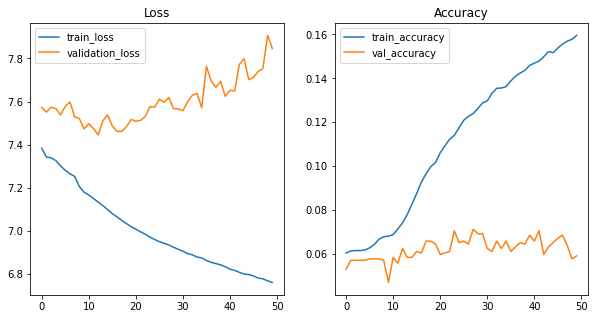

In [159]:
train_loss = results['loss']
train_acc = results['accuracy']
val_loss =results['val_loss']
val_acc = results['val_accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(train_loss, label='train_loss')
ax1.plot(val_loss, label='validation_loss')
ax1.set_title("Loss")
ax1.legend()

ax2.plot(train_acc, label='train_accuracy')
ax2.plot(val_acc, label='val_accuracy')
ax2.set_title("Accuracy")
ax2.legend()

# Generate Predictive text

In [48]:
def prepare_input(text):
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x
prepare_input("It is not".lower())

it
is
not


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [49]:
import heapq

In [47]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [46]:
def predict_completions(text, n=3):
    if text == "":
        return("0")
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [unique_words[idx] for idx in next_indices]

In [51]:
q =  input("ENTER TEXT: ")
# print("correct sentence: ",q)
seq = " ".join(tokenized.tokenize(q.lower())[0:3])
print("Sequence: ",seq)
print("next possible words: ", predict_completions(seq, 5))

ENTER TEXT: There was nothing so VERY remarkable in that
Sequence:  there was nothing
there
was
nothing
next possible words:  ['on', 'for', 'or', 'in', 'but']


In [25]:
while True:pass

KeyboardInterrupt: ignored

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
